# Titanic Project

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Collecting Data Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Here in the data we have 4 object types
1. Name
2. Sex
3. Cabin 
4. Embarked

### lets find unique values in above four ,so that we can confirm whether it belongs to categeorical data

In [62]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [63]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [64]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### lets find shape

In [65]:
df.shape

(891, 12)

#### We have 891 rows and 12 columns

# Column Names

In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### As the passenger id is of no use in dataframe droping the column

In [68]:
df.drop('PassengerId',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# EXPLORATORY DATA ANALAYSIS

#### Checking if any NAN values present in dataframe

In [70]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

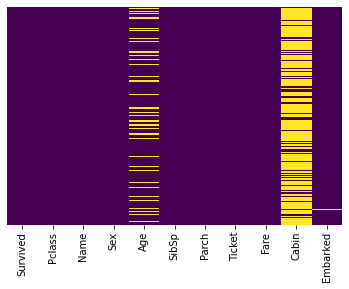

In [71]:
#### lets see in visulaize format of Nan values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### we have NAN values in 3 columns
1. Age
2. cabin
3. Emabarked

In [72]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [73]:
#df['Age'].interpolate(inplace=True)

In [74]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Filling Age missing values with mean of that

In [75]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

#### Filling embarked missing values with mode of that column because it is of categeorical type

In [76]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

In [77]:
df.drop(columns=['Cabin'],inplace = True)

In [78]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### All the null values are handled now

In [79]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# VISUALISATION

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

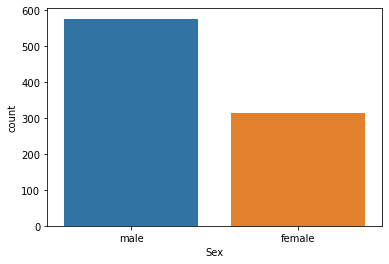

In [80]:
sns.countplot(df['Sex'])

In [81]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### observation
1. Males are present in more members in titanic
2. Males: 577
3. Females: 314

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

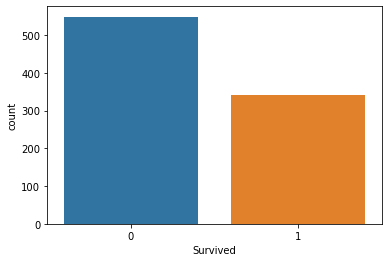

In [82]:
sns.countplot(df['Survived'])

In [83]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Observation
1. 0 indicates not survived
2. 1 indicates survived
3. 549 not survived, 342 survived

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

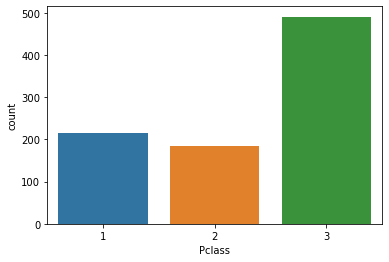

In [84]:
sns.countplot(df['Pclass'])

In [85]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Observation
1. 1 indicates 1st class
2. 2,3 indicates 2nd and 3rd class
3. from the graph values we can say,
    - 216 people boarded 1st class
    - 184 people boarded 2nd class
    - 491 people boarded third class

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

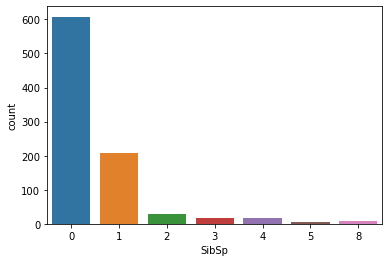

In [86]:
sns.countplot(df['SibSp'])

Above graph says that there is not much sibling spouse count in the dataset

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

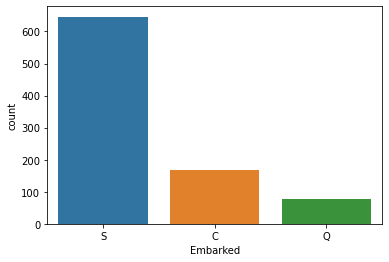

In [87]:
sns.countplot(df['Embarked'])

s count is more in the dataset

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

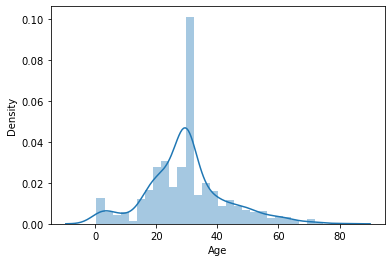

In [88]:
sns.distplot(df['Age'])

As per the graph most of the people are of age in between 20-35

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

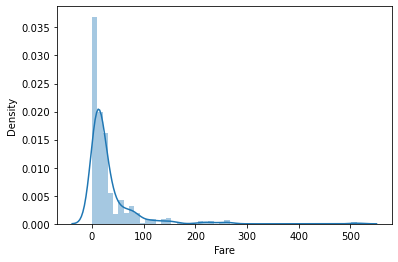

In [89]:
sns.distplot(df['Fare'])

#### Observation
1. The data is skewed to the left side
2. most of the people are in third class as the data is high at low price

<AxesSubplot:xlabel='Pclass'>

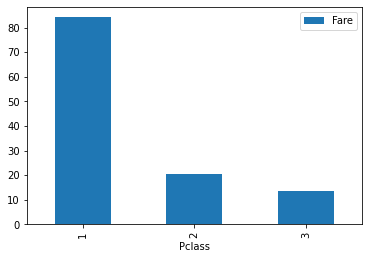

In [90]:
df.pivot_table(index='Pclass', values='Fare').plot(kind='bar')

#### Observation 
1. as the pclass is decreasing fare is decreasing

<AxesSubplot:xlabel='Pclass'>

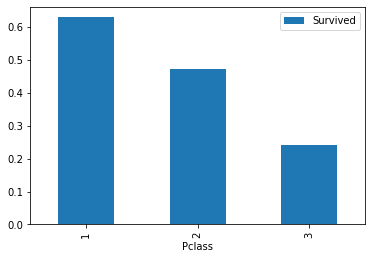

In [91]:
df.pivot_table(index='Pclass', values='Survived').plot(kind='bar')

#### Observation
From the above graph we can say that survival rate is more in 1 class

In [92]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Sex'>

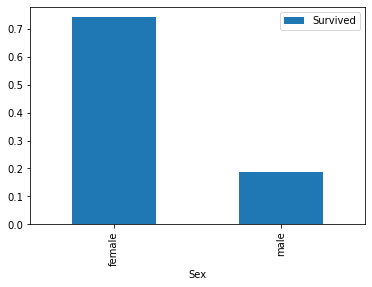

In [93]:
df.pivot_table(index='Sex', values='Survived').plot(kind='bar')

#### Observation 
Female survival rate is more in the data set

### As the fare data is highly skewed lets make it uniform using log transformation


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

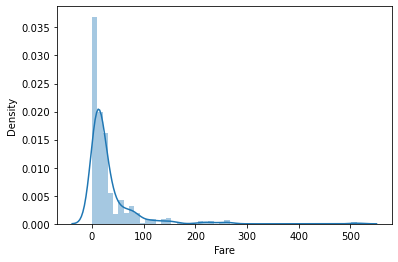

In [94]:
sns.distplot(df['Fare'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

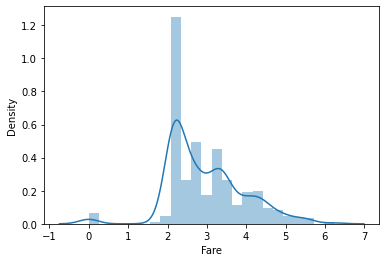

In [95]:
df['Fare'] = np.log(df['Fare']+1)
sns.distplot(df['Fare'])

As we can see now the data is uniformly distributed

## Lets find the Correlation of the data

<AxesSubplot:>

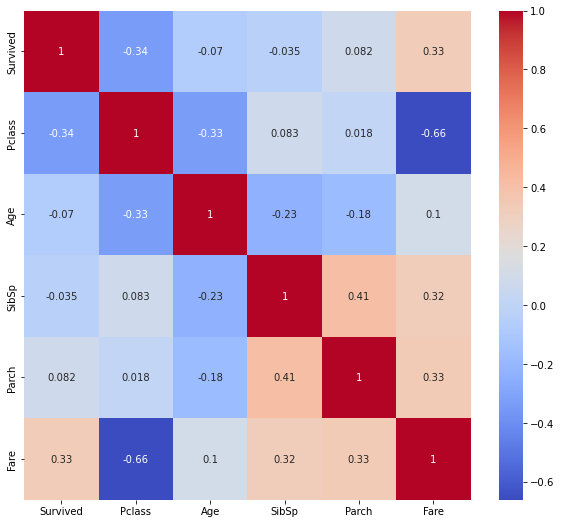

In [96]:
corr = df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

#### Observation
1. from the above heat map we can say that pclass is contributing more too the dataset
2. pclass has high negative correlation with the fare
3. Based on the Fare data we can say it is contributing to every column in the dataset


# Label Encoding and dropping the unuseful columns


In [97]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


#### As per the data if you see Ticket and Name column doesnt make any effort in model Creation so dropping it

In [98]:
df.drop('Ticket',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [99]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
213,0,2,male,30.0,0,0,2.639057,S


#### Lets do label encoding now by getting Unique values

##### Label encoding now is useful for below columns
1. Sex
2. Embarked

In [100]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [101]:
# df['Sex']=df['Sex'].map({'female':0,'male':1})
# df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
# df.head()

In [102]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
cols = ['Sex','Embarked']
for col in cols:
    df[col]=lb.fit_transform(df[col])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [103]:
for i in df.columns:
    print(len(df[i]))

891
891
891
891
891
891
891
891


In [104]:
#df.plot(kind='box',subplots=True, layout=(2,4))
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [105]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [106]:
print(X.shape)
print(y.shape)

(891, 7)
(891,)


# Model Training

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
def model_predictor(model):
    model.fit(x_train,y_train)
    print('Accuracy : ', model.score(x_test,y_test))
    score = cross_val_score(model,X,y, cv=5)
    print(score)
    print('CV Score : ', np.mean(score))

### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_predictor(model)

Accuracy :  0.8071748878923767
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
CV Score :  0.7833971502102819


### Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model_predictor(model)

Accuracy :  0.7668161434977578
[0.72625698 0.74719101 0.76404494 0.80337079 0.79775281]
CV Score :  0.7677233067604042


### Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_predictor(model)

Accuracy :  0.7354260089686099
[0.73184358 0.75842697 0.78089888 0.74719101 0.81460674]
CV Score :  0.7665934341849224


### Random Forest Regressor

In [111]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_predictor(model)

Accuracy :  0.7892376681614349
[0.7877095  0.79775281 0.86516854 0.78089888 0.83707865]
CV Score :  0.8137216747222397


### XG Boost Classifier

In [112]:
from xgboost import XGBClassifier
model = XGBClassifier()
model_predictor(model)

Accuracy :  0.7892376681614349
[0.7877095  0.81460674 0.84269663 0.78651685 0.83146067]
CV Score :  0.8125980792166217


In [113]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
model_predictor(model)

Accuracy :  0.8295964125560538
[0.81564246 0.79775281 0.84831461 0.79775281 0.85393258]
CV Score :  0.8226790534178645


### As we can see CatBoostClassifier is giving good results other than different ML Algos 

# LETS TRAIN THE MODEL WITH FULL DATA

In [114]:
model = CatBoostClassifier(verbose=0)
model.fit(X,y)

In [115]:
catboostpred = model.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
roc_auc_score(y_test,catboostpred)

0.889610934093577

# Saving the Model

In [117]:
import joblib
joblib.dump(model,"Titanic.pkl")

['Titanic.pkl']

# Loading the Model

In [118]:
modl=joblib.load("Titanic.pkl")
print(modl.predict(x_test))

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0]
